### 1.	Create a python function to scrape Yelp data for 50 restaurants close to you OR Craigslist for the top 50 items of any topic interesting to you. Think about what data you want to scrape aside from the name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as possible.

In [104]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import time
import csv
import re

In [107]:
#Save in a file
filename = "YELP_MEXICANS.txt"

f = open(filename, "w")

header = "Rest_Name, Rest_Ratings, Rest_Nofreviews, Rest_Tags"

f.write(header)

51

In [116]:
base_url = 'https://www.yelp.com/search?find_desc=Restaurants+-+Mexican&find_loc=Saint+Louis%2C+MO&start='

names = []
ratings = []
reviews = []
restags = []

for i in range(10, 60, 10):
    url = base_url + str(i)
    page=requests.get(url)
    soup = bs(page.text,'html.parser')
    mains = soup.find_all("div", class_="arrange-unit__09f24__rqHTg arrange-unit-fill__09f24__CUubG border-color--default__09f24__NPAKY")
    
    for main in mains:
        try:
            busname = main.find("a", class_="css-1m051bw").text
            names.append(busname)
        except:
            pass  
    
        try:
            rating = main.find("span", {"class" : "display--inline__09f24__c6N_k border-color--default__09f24__NPAKY"}).div.get('aria-label')
            ratings.append(rating)
        except:
            pass
    
        try:
            noreviews = main.find("span", class_="reviewCount__09f24__tnBk4 css-chan6m").text
            reviews.append(noreviews)
        except:
            pass
    
        try:
            tags = main.find_all("p", {"class" : "css-dd1rsv"})
            if len(tags) !=  0:
                tagtext = ''
                for tag in tags:
                    tagtext = tagtext + '  ' + tag.text
                restags.append(tagtext)
        except:
            pass
        f.write("\n" + busname + "," + rating + "," + noreviews + "," + tagtext)
    
f.close()

Rest_Name: Dos Reyes Mexican Restaurant
Rest_Noreviews: 199
Tags:   Mexican  Breakfast & Brunch
Rest_Name: El Burro Loco
Rest_Noreviews: 483
Tags:   Mexican
Rest_Name: Taqueria El Bronco
Rest_Noreviews: 253
Tags:   Mexican
Rest_Name: El Morelia Super Mercado
Rest_Noreviews: 32
Tags:   Mexican
Rest_Name: La Manganita
Rest_Noreviews: 6
Tags:   Mexican
Rest_Name: Chimi’s Fresh-Mex
Rest_Noreviews: 128
Tags:   Mexican  Tex-Mex
Rest_Name: 3 De Mayo
Rest_Noreviews: 15
Tags:   Mexican
Rest_Name: Uncle Julio’s
Rest_Noreviews: 143
Tags:   Tex-Mex  Mexican
Rest_Name: Más Tequila Cantina
Rest_Noreviews: 102
Tags:   Mexican
Rest_Name: Mi Ranchito
Rest_Noreviews: 380
Tags:   Mexican  Bars  Seafood
Rest_Name: Taqueria Durango
Rest_Noreviews: 201
Tags:   Mexican
Rest_Name: Sunny’s Cantina
Rest_Noreviews: 88
Tags:   Burgers  Mexican  Cocktail Bars
Rest_Name: Lilly’s Panaderia
Rest_Noreviews: 14
Tags:   Mexican
Rest_Name: El Comal
Rest_Noreviews: 30
Tags:   Latin American  Tex-Mex
Rest_Name: El Guanaco


In [117]:
restaurants = {"Rest_Name": names, "Rest_Ratings" : ratings, "Rest_Nofreviews" : reviews, "Rest_Tags" : restags}

In [119]:
res_df = pd.DataFrame(restaurants)

In [122]:
res_df

,Rest_Name,Rest_Ratings,Rest_Nofreviews,Rest_Tags
0,Dos Reyes Mexican Restaurant,4.5 star rating,199,Mexican Breakfast & Brunch
1,El Burro Loco,4 star rating,483,Mexican
2,Taqueria El Bronco,4 star rating,253,Mexican
3,El Morelia Super Mercado,4.5 star rating,32,Mexican
4,La Manganita,5 star rating,6,Mexican
5,Chimi’s Fresh-Mex,4.5 star rating,128,Mexican Tex-Mex
6,3 De Mayo,4.5 star rating,15,Mexican
7,Uncle Julio’s,3 star rating,143,Tex-Mex Mexican
8,Más Tequila Cantina,4 star rating,102,Mexican
9,Mi Ranchito,4 star rating,380,Mexican Bars Seafood


In [130]:
res_df.to_csv('YELP_MEXICANE.csv', encoding = "UTF-16LE")

### 2.	Create a local API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .

Brief and honest: could not make this one work...

### 3.	What is web scraping? Why is it helpful? What does it mean for your online presence? Refence the readings and DataCamp. 

Web scraping is the process of collecting structured web data in an automated fashion, that is without the need to manually clicking copying or pasting data from the source pages. Using web scraping we can do sentimental analysis over social media on our favorite politicians or stocks,  price or news monitoring,  market research or anything else that requires data accessible on the internet. Most importantly it is able to provide the data in a structured manner. As for our online presence, implications are twofold: we ant to be prudent to escape our own data being misused as well as we should be ethical in using web scaping in accordance to the wishes of the webpage owners.

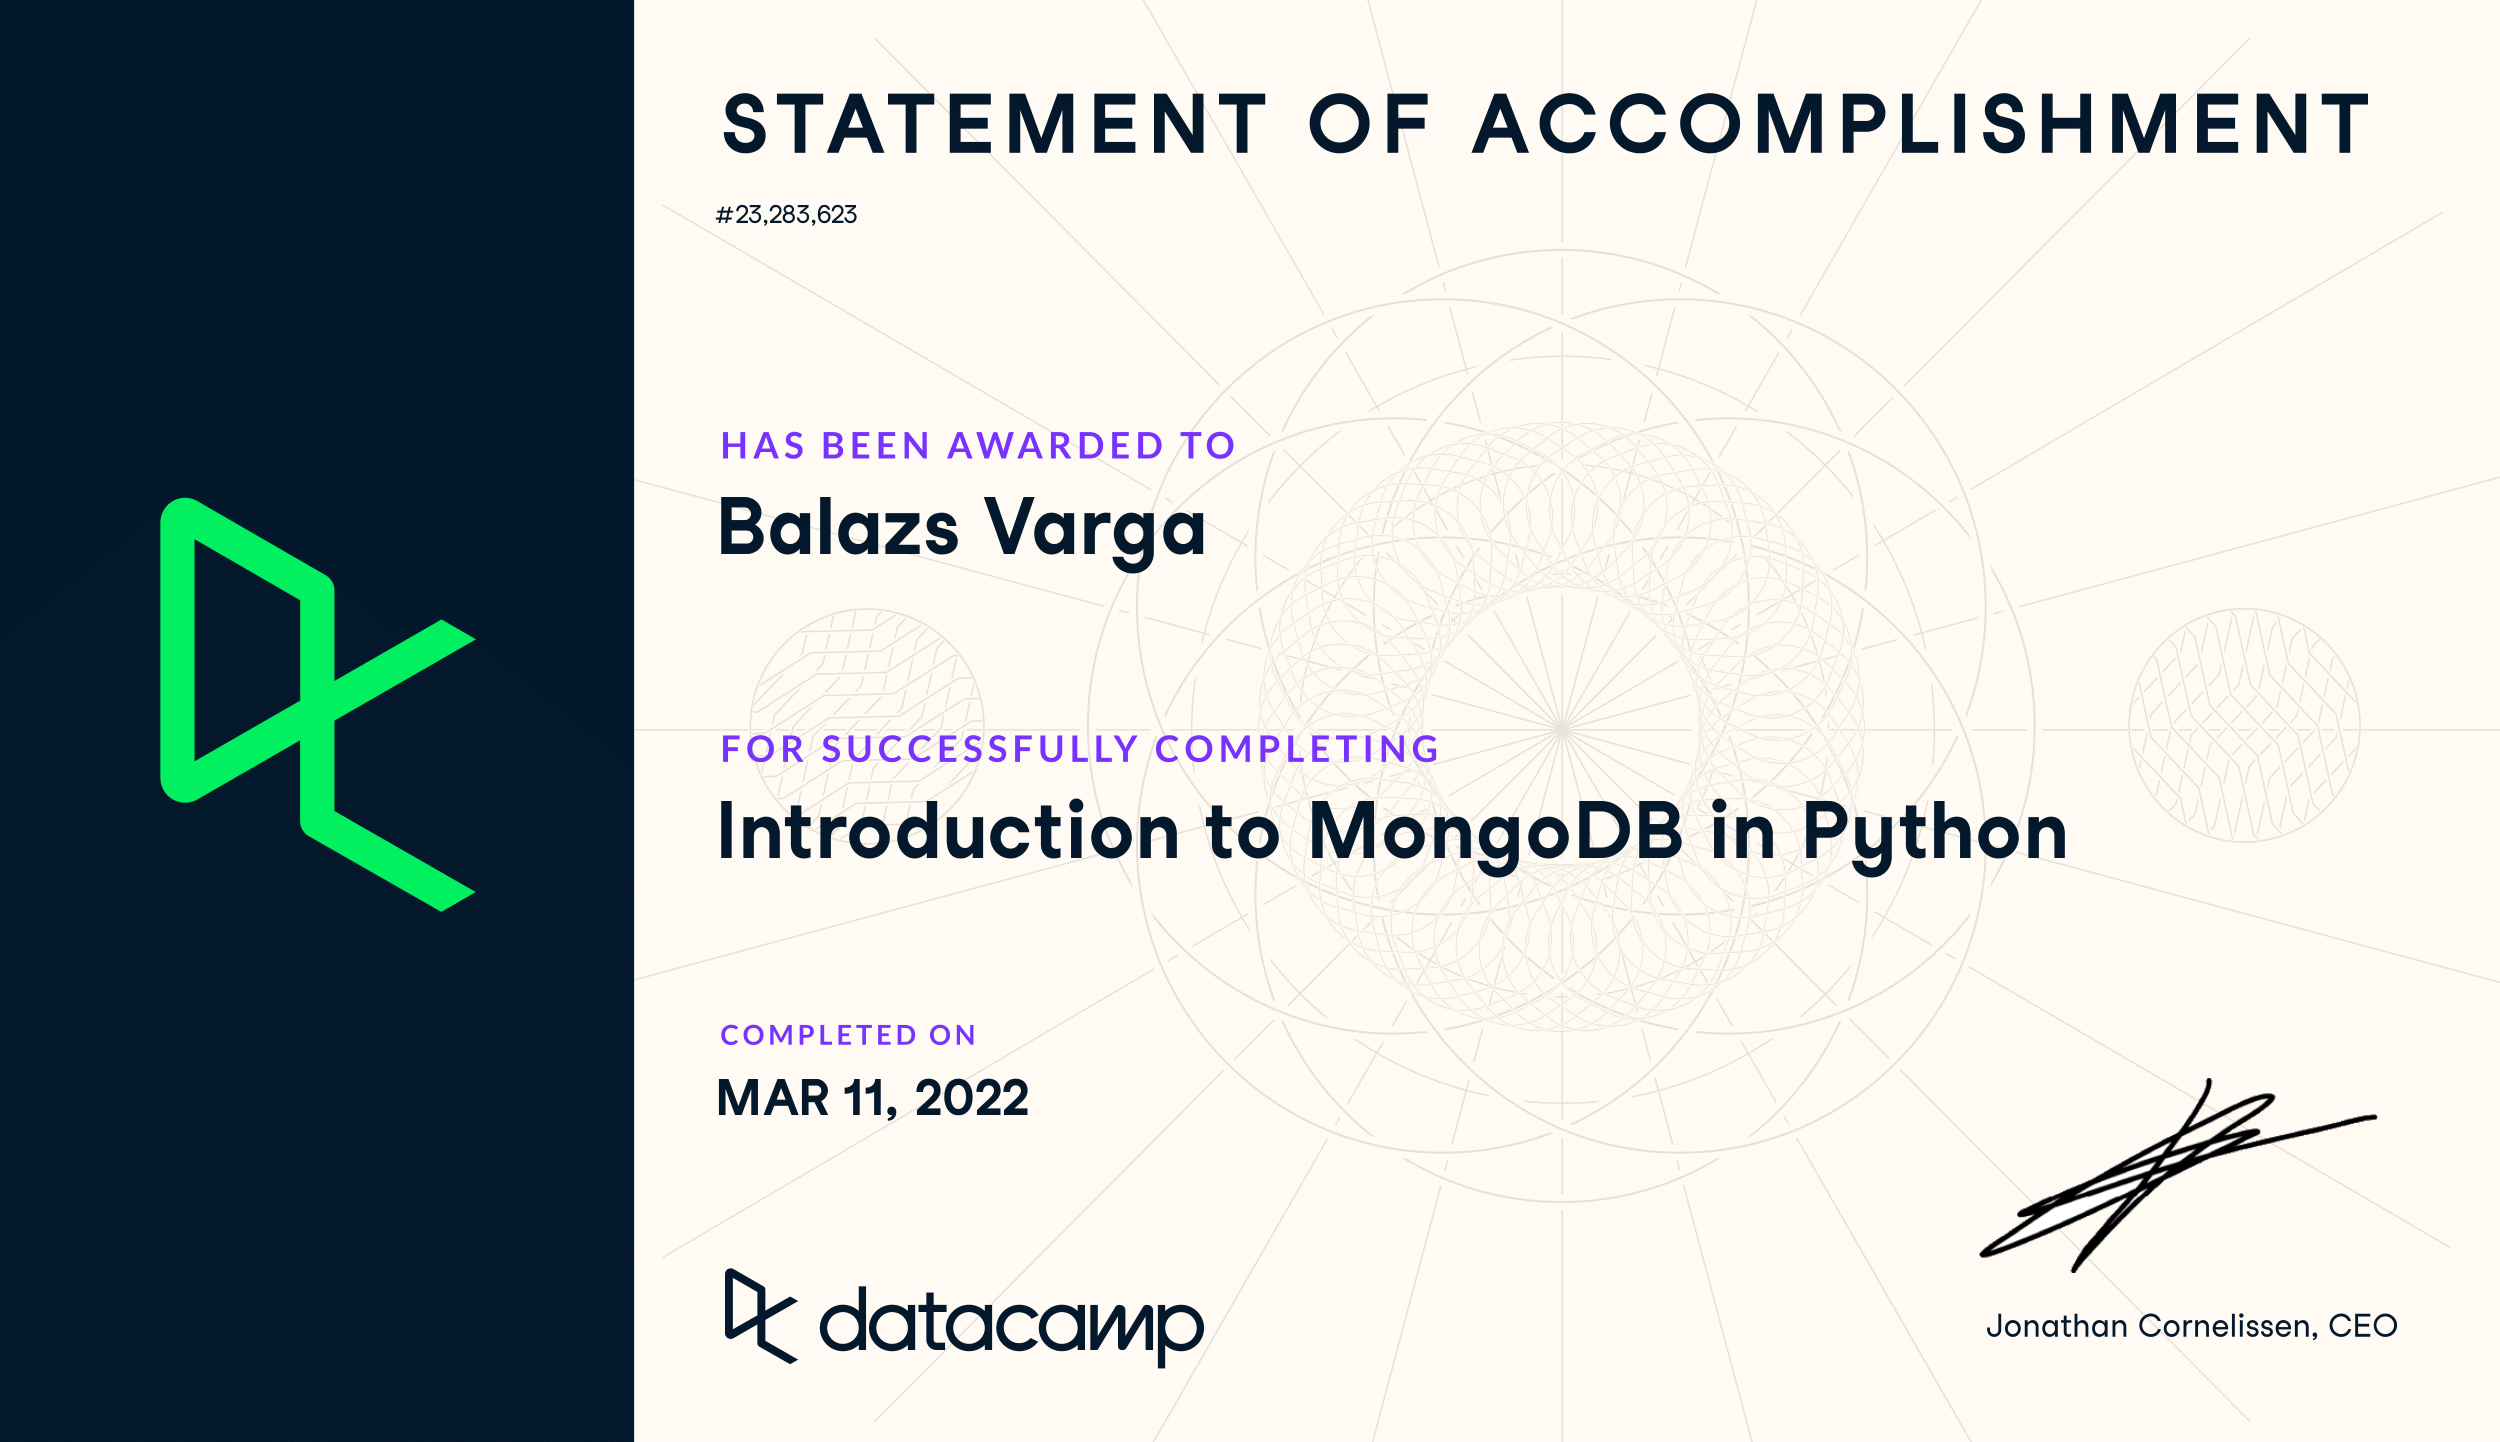

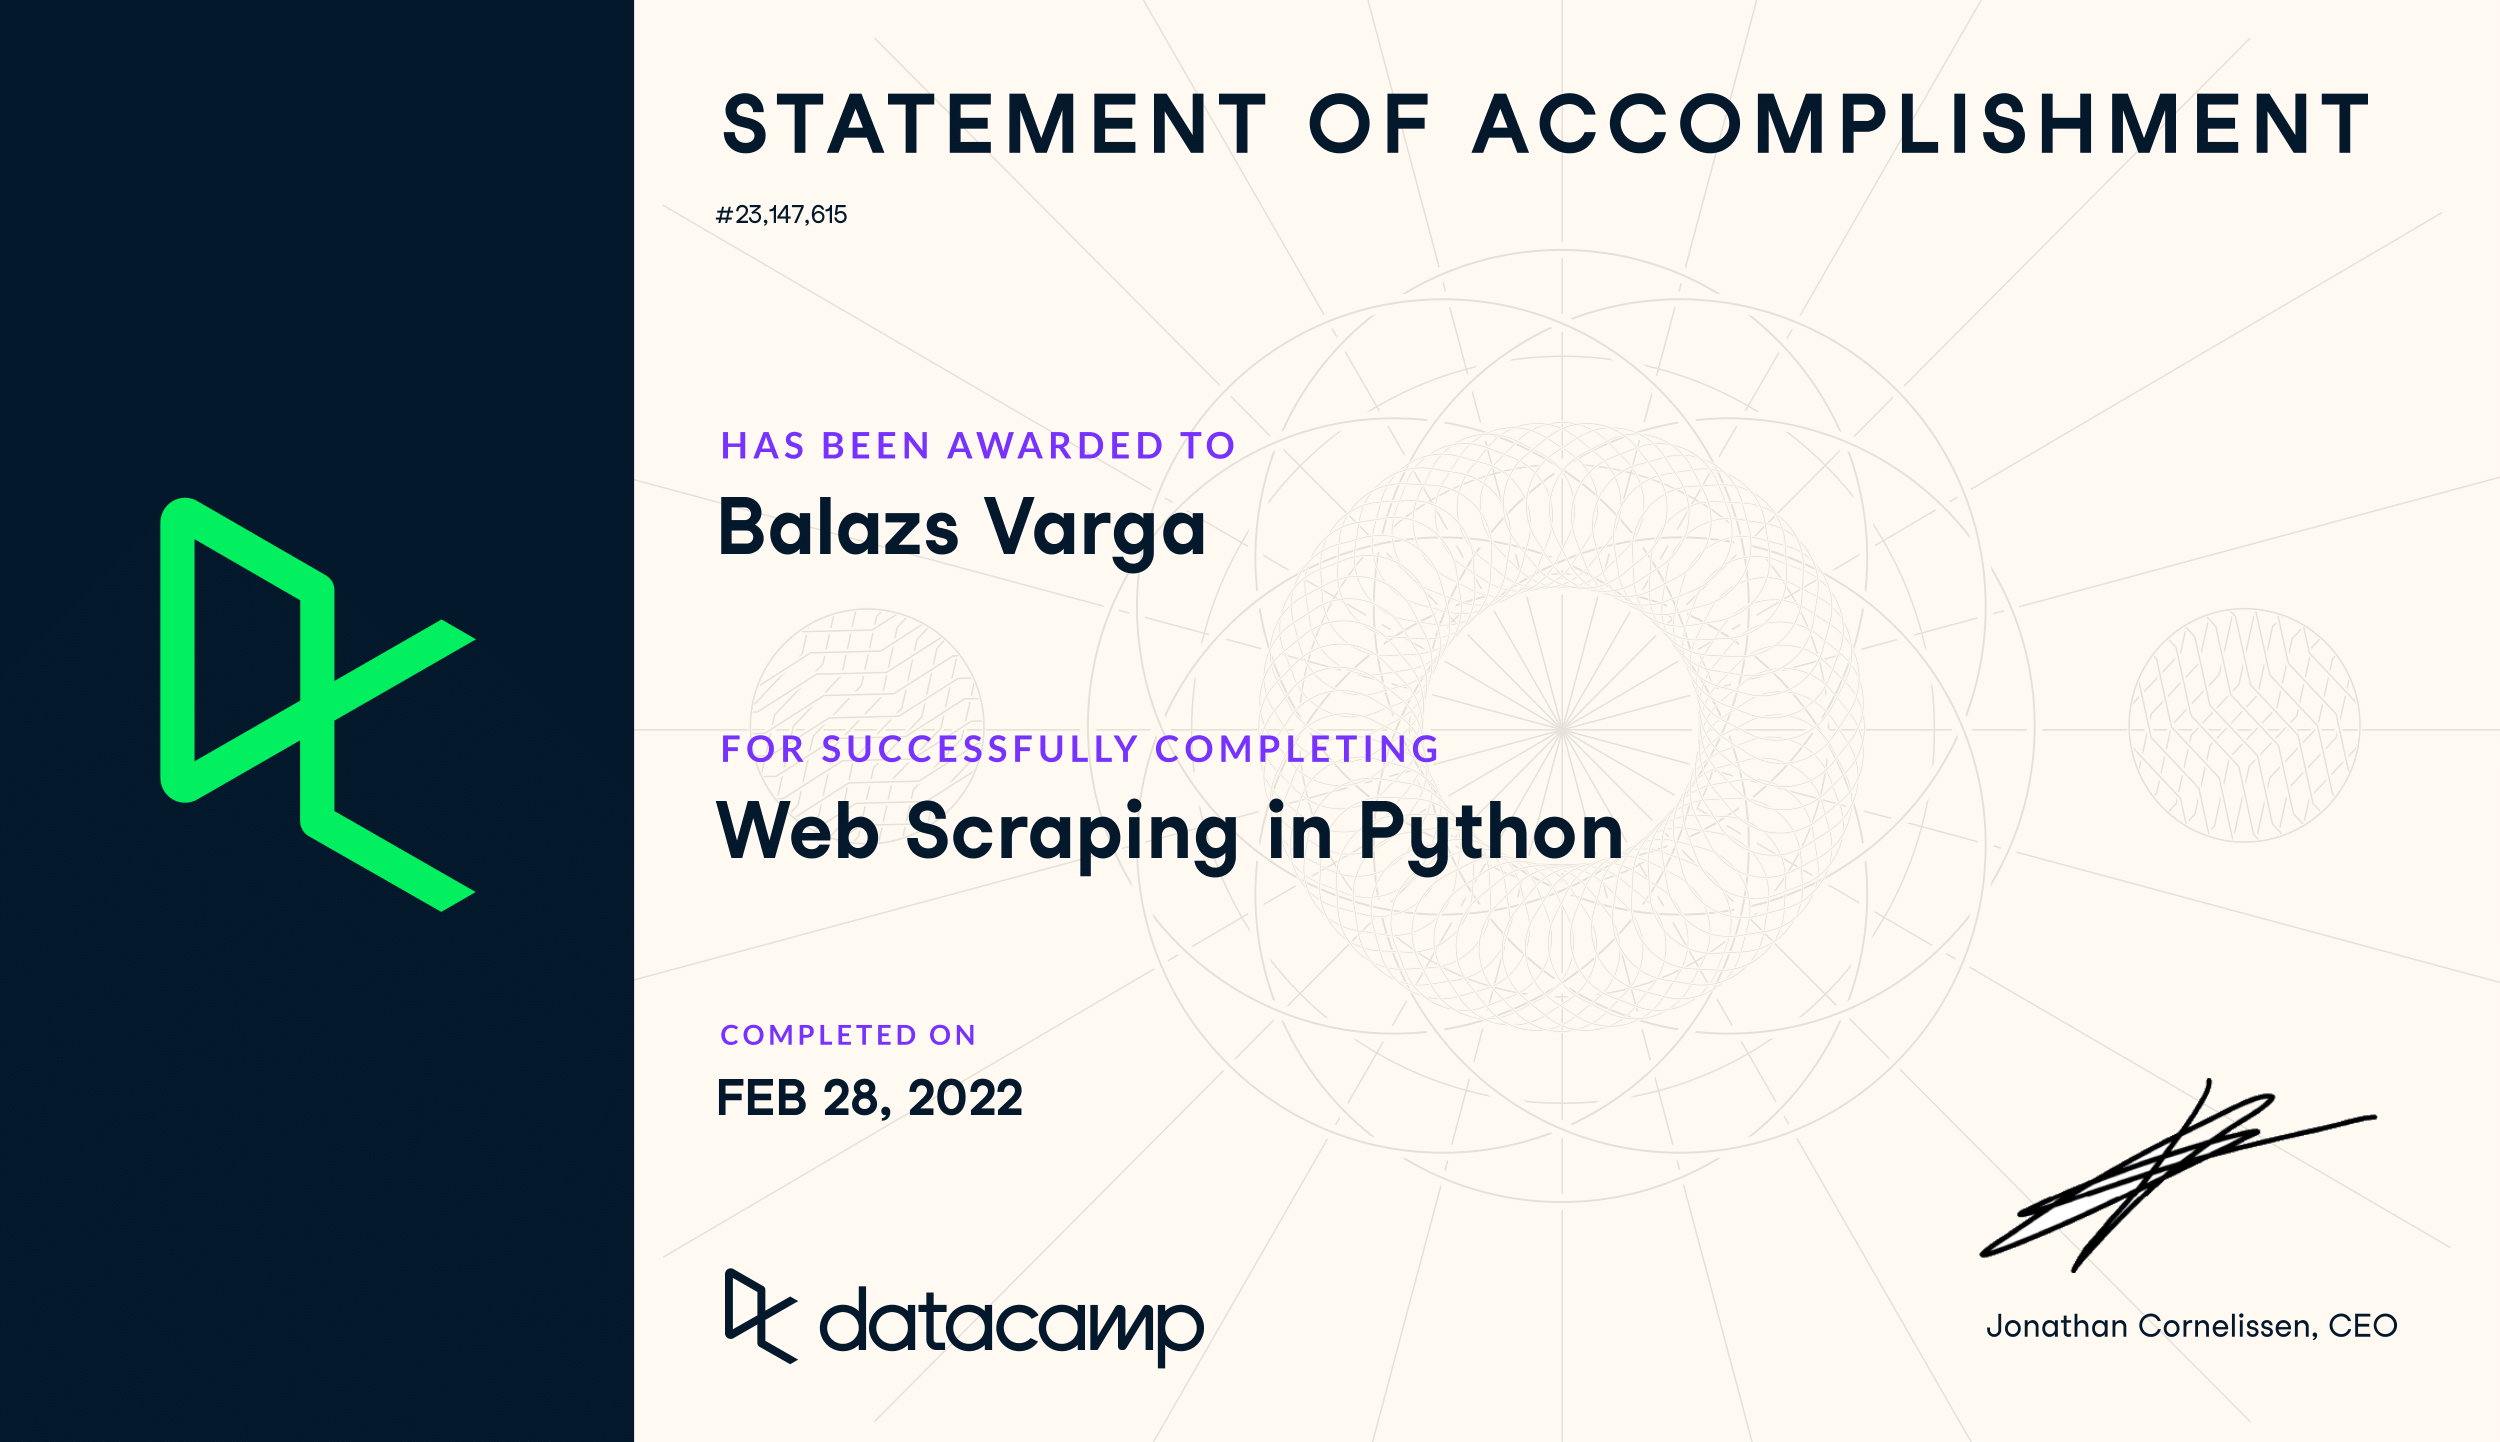